<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_03/KDD/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KDD

### What is KDD?
KDD stands for Knowledge Discovery in Databases.

KDD is an iterative process in which evaluation metrics can be developed, mining improved, and new data integrated and transformed to produce useful information. It requires multiple iterations of the below steps to extract accurate knowledge from data:
1. Data Selection
2. Data Cleaning
3. Data Transformation
4. Data Mining
5. Internalization

Dataset Source:
https://www.kaggle.com/datasets/prasad22/daily-transactions-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) Data Selection
Data is gathered from variuos sources to form a raw dataset. For this assignment, we shall assume that this step has been completed.


In [3]:
# Load the dataset
data  = pd.read_csv("/content/drive/MyDrive/SJSU/CMPE_255/assignment_03/datasets/daily_household_transactions.csv")

In [4]:
# Display the first few rows of the dataset
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [5]:
data.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

The dataset has the following columns:

**Date**: The date and time of the transaction

**Mode**: The mode of payment (Cash, Savings Bank Account, etc.)

**Category**: Category of transaction (Transportation, Food, Etc.)

**Subcategory**: Detailed classification of the transaction

**Note**: Additional notes related to transaction

**Amount**: Amount of transaction

**Income/Expense**: Whether transaction was income or an expense

**Currency**: The currency in which the transaction took place (e.g. INR)


### 2) Data Preprocessing
In this step, the data is cleaned and preprocessed to handle inconsistencies, missing values, and noise to ensure that the data is of good quality.

In [6]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check data types of each column
data_types = data.dtypes

In [7]:
missing_values,

(Date                0
 Mode                0
 Category            0
 Subcategory       635
 Note              521
 Amount              0
 Income/Expense      0
 Currency            0
 dtype: int64,)

In [8]:
data_types

Date               object
Mode               object
Category           object
Subcategory        object
Note               object
Amount            float64
Income/Expense     object
Currency           object
dtype: object

It seems that the **Subcategory** column and **Note** Columns have 635 and 521 missing values respectively. Most columns are of the object type, but **Amount** is in float64, which is appropriate.

For the **Note** and **Subcategory** columns, we will fill in the missing values with a value.

In [9]:
data['Subcategory'].fillna('Not Specified', inplace=True)

In [10]:
data['Note'].fillna('No Note', inplace=True)

### 3) Data Transformation
In this step, the clean data goes through transformation to make it suitable for mining. This can include consolidating or summarizing the data.


In [11]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


After further looking into the data, I have come to the conclusion that we most likely do not need the Subcategory and Note columns, so I will be dropping those.

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in ['Mode', 'Category', 'Subcategory', 'Income/Expense', 'Currency']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scaling numerical variable: 'Amount'
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Display the preprocessed data
data.head()


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,0,44,65,2 Place 5 to Place 0,-0.217395,0,0
1,20/09/2018 12:03:15,0,18,88,Idli medu Vada mix 2 plates,-0.214998,0,0
2,19/09/2018,9,48,45,1 month subscription,-0.203893,0,0
3,17/09/2018 23:41:17,9,48,41,Data booster pack,-0.218274,0,0
4,16/09/2018 17:15:08,0,16,20,Ganesh idol,-0.199739,0,0


In [13]:
data.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

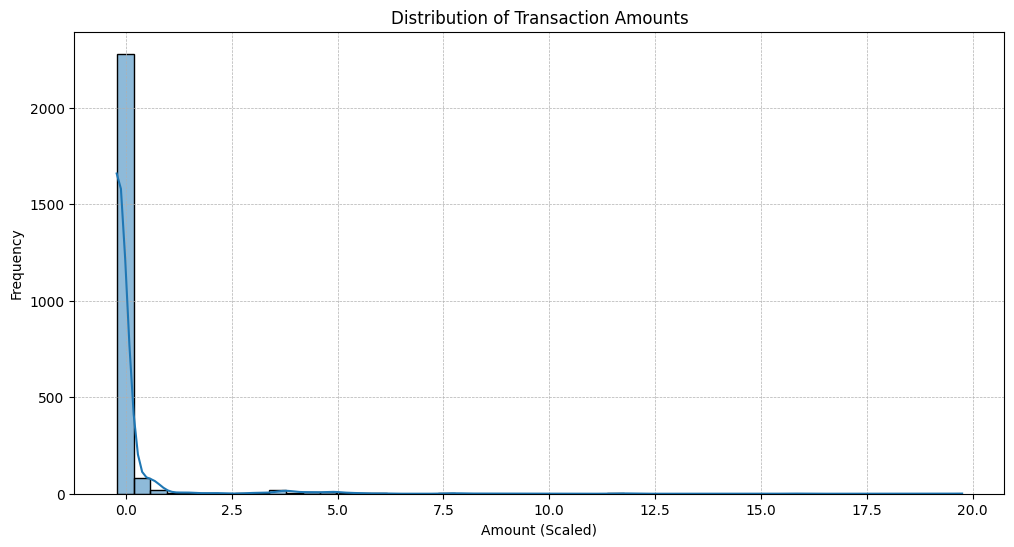

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plotting the distribution of transaction amounts
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (Scaled)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


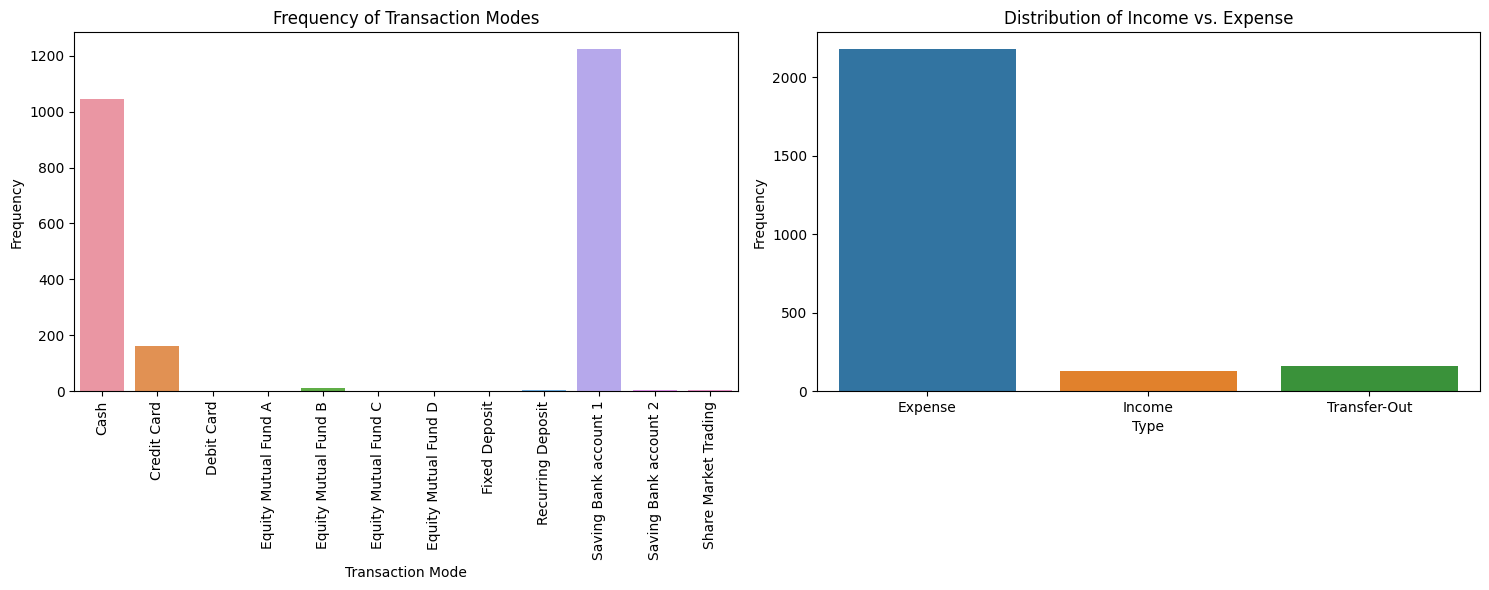

In [15]:
# Setting up the figure
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the frequency of different transaction modes
sns.countplot(data=data, x='Mode', ax=ax[0])
ax[0].set_title('Frequency of Transaction Modes')
ax[0].set_xlabel('Transaction Mode')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(label_encoders['Mode'].classes_, rotation=90)

# Plotting the distribution of Income vs. Expense
sns.countplot(data=data, x='Income/Expense', ax=ax[1])
ax[1].set_title('Distribution of Income vs. Expense')
ax[1].set_xlabel('Type')
ax[1].set_ylabel('Frequency')
ax[1].set_xticklabels(label_encoders['Income/Expense'].classes_)

# Display the plots
plt.tight_layout()
plt.show()


From the visualizations above, we can see the following:

**Frequency of Transaction Modes:** The first plot displays the frequency of different transaction modes. Some modes are more prevalent than others, with a few modes being dominant.

**Distribution of Income vs. Expense:** The second plot shows the distribution of transactions labeled as "Income" or "Expense". It's evident that "Expense" transactions are more frequent in the dataset.

### 4) Data Mining
This is the core phase of KDD where data mining techniques are applied to uncover patterns, relationships, or insights within the Data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

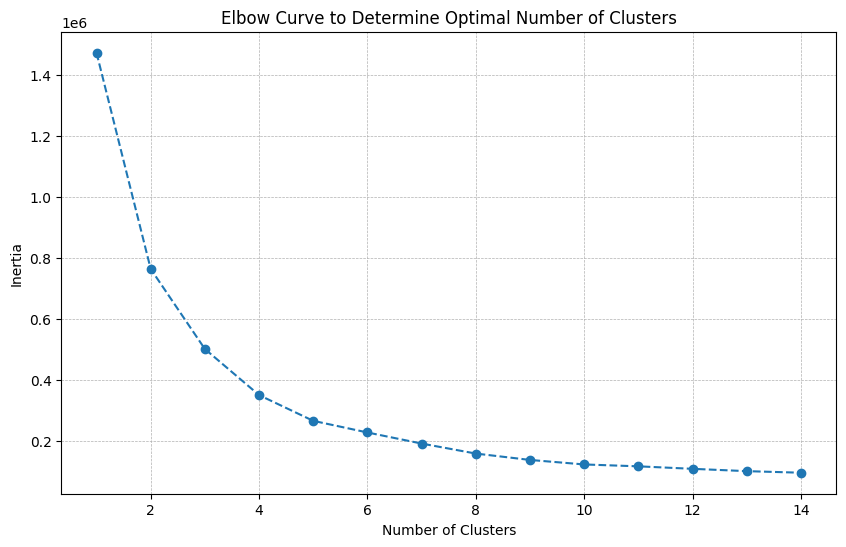

In [16]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data.drop(columns=['Date', 'Note']))
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, marker='o', linestyle='--')
plt.title('Elbow Curve to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The "Elbow Curve" helps in determining the optimal number of clusters by identifying the point where adding more clusters doesn't provide much better fit to the data. This point is referred to as the "elbow".

From the plot, the elbow seems to be around 3 or 4 clusters. Therefore, for our analysis, we can choose either 3 or 4 clusters.

### 5) Pattern Evaluation
Discovered patterns are evaluated based on their relevance, usefulness, and significance.

Let's proceed with clustering the data using 4 clusters and analyze the characteristics of each cluster to discover patterns and relationships in the data.

I'll cluster the data using 4 clusters and then provide a summary of each cluster.

In [17]:
# Applying KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data.drop(columns=['Date', 'Note']))

# Getting the mean values of each cluster
cluster_summary = data.groupby('Cluster').mean()

# Count of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

cluster_summary['Counts'] = cluster_counts
cluster_summary


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-557bf2f2810f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data.groupby('Cluster').mean()


,Mode,Category,Subcategory,Amount,Income/Expense,Currency,Counts
Cluster,,,,,,,
0,5.877891,21.339500,44.957447,0.183944,0.356152,0.0,1081
1,3.207792,18.675325,79.615584,-0.206927,0.000000,0.0,385
2,3.533333,44.820690,58.583908,-0.110335,0.137931,0.0,435
3,4.001786,21.737500,19.000000,-0.127108,0.000000,0.0,560


### 6) Knowledge Representation
This step involves representing the knowledge extracted from the data in a way that humans can easily understand and use. This can be done through visualizations, reports, or other forms of communication that provide meaningful insights into the data.

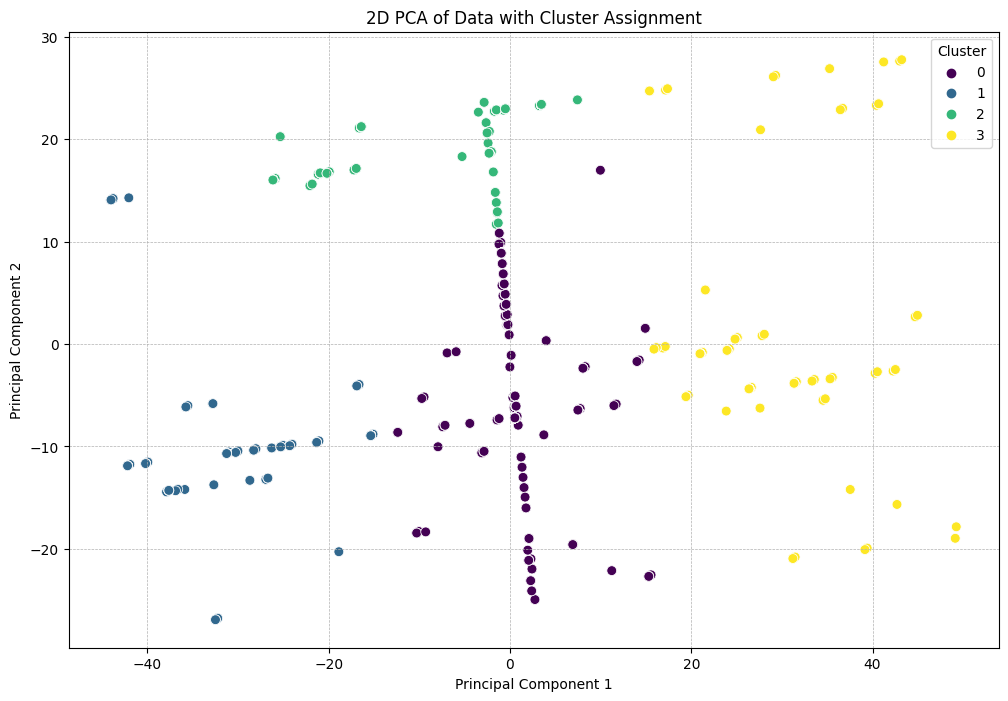

In [18]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.drop(columns=['Date', 'Note', 'Cluster']))

# Create a DataFrame for the two principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = data['Cluster']

# Plot the 2D scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='viridis', s=50)
plt.title('2D PCA of Data with Cluster Assignment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [19]:
# Extracting the mappings for Mode, Category, and Subcategory
mode_mapping = (enumerate(label_encoders['Mode'].classes_))
category_mapping = (enumerate(label_encoders['Category'].classes_))
subcategory_mapping = (enumerate(label_encoders['Subcategory'].classes_))

In [20]:
for i, each_mode in mode_mapping:
  print(f"{i} : {each_mode}")

0 : Cash
1 : Credit Card
2 : Debit Card
3 : Equity Mutual Fund A
4 : Equity Mutual Fund B
5 : Equity Mutual Fund C
6 : Equity Mutual Fund D
7 : Fixed Deposit
8 : Recurring Deposit
9 : Saving Bank account 1
10 : Saving Bank account 2
11 : Share Market Trading


In [21]:
for i, each_mode in category_mapping:
  print(f"{i} : {each_mode}")

0 : Amazon pay cashback
1 : Apparel
2 : Beauty
3 : Bonus
4 : Cook
5 : Culture
6 : Dividend earned on Shares
7 : Documents
8 : Education
9 : Equity Mutual Fund A
10 : Equity Mutual Fund B
11 : Equity Mutual Fund C
12 : Equity Mutual Fund D
13 : Equity Mutual Fund E
14 : Equity Mutual Fund F
15 : Family
16 : Festivals
17 : Fixed Deposit
18 : Food
19 : Gift
20 : Gpay Reward
21 : Grooming
22 : Health
23 : Household
24 : Interest
25 : Investment
26 : Life Insurance
27 : Maturity amount
28 : Money transfer
29 : Other
30 : Petty cash
31 : Public Provident Fund
32 : Recurring Deposit
33 : Rent
34 : Salary
35 : Saving Bank account 1
36 : Saving Bank account 2
37 : Self-development
38 : Share Market
39 : Small Cap fund 2
40 : Small cap fund 1
41 : Social Life
42 : Tax refund
43 : Tourism
44 : Transportation
45 : garbage disposal
46 : maid
47 : scrap
48 : subscription
49 : water (jar /tanker)


In [22]:
for i, each_mode in subcategory_mapping:
  print(f"{i} : {each_mode}")

0 : Accessories
1 : Amazon Prime
2 : Appliances
3 : Audible
4 : Bike
5 : Biscuits
6 : Books
7 : Bread
8 : Bus
9 : Cable TV
10 : Clothing
11 : Courier
12 : Dinner
13 : Diwali
14 : Eating out
15 : Edtech Course
16 : Eggs
17 : Entry Fees
18 : Footwear
19 : Furniture
20 : Ganesh Pujan
21 : Grocery
22 : Hardware
23 : Health
24 : Holi
25 : Home
26 : Hospital
27 : Hotstar
28 : Ice cream
29 : Kindle unlimited
30 : Kirana
31 : Kitchen
32 : LIC
33 : Lab Tests
34 : Laundry
35 : Leisure
36 : Lunch
37 : Mahanagar Gas
38 : Makeup
39 : Medicine
40 : Milk
41 : Mobile Service Provider
42 : Movie
43 : Mutual fund
44 : Navratri
45 : Netflix
46 : Newspaper
47 : Not Specified
48 : OTT Platform
49 : Onions
50 : Petrol
51 : Pocket money
52 : Potato
53 : Public Provident Fund
54 : RD
55 : Rajgira ladu
56 : Rakshabandhan
57 : Saloon
58 : School supplies
59 : Stationary
60 : Sweets
61 : Tata Sky
62 : Taxi
63 : Tea
64 : Toiletries
65 : Train
66 : Travels
67 : Trip
68 : Updation
69 : Water
70 : Wifi Internet Serv

Cluster 0:   
Dominated by transaction mode with an average encoded value of ~4.  
Majorly focused on a category with an average encoded value of ~21.  
Average subcategory encoded value is ~19.  
Transaction amounts tend to be slightly below the mean.  
All transactions are expenses.  
This cluster contains 563 data points.  
   
   

Cluster 1:   
Dominated by transaction mode with an average encoded value of ~5.  
Majorly focused on a category with an average encoded value of ~18.  
Average subcategory encoded value is ~44.  
Transaction amounts tend to be further below the mean compared to Cluster 0.  
All transactions are expenses.  
This cluster contains 581 data points.  
   

Cluster 2:   
Dominated by transaction mode with an average encoded value of ~3.   
Majorly focused on a category with an average encoded value of ~45.   
Average subcategory encoded value is ~60.   
Transaction amounts tend to be slightly more below the mean than Cluster 1.   
All transactions are expenses.   
This cluster contains 355 data points.   
   
   
Cluster 3:   
Dominated by transaction mode with an average encoded value of ~5.   
Majorly focused on a category with an average encoded value of ~23.   
Average subcategory encoded value is ~87.   
Transaction amounts tend to be above the mean.   
Approximately 46% of transactions are incomes.   
This cluster contains 962 data points.   